In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

import yfinance as yf
%matplotlib inline

### Scarico dati

In [2]:
start = datetime.date(2014,5,31)
end = datetime.date(2024,3,31)
msft = yf.download('MSFT', start, end)

[*********************100%%**********************]  1 of 1 completed


In [3]:
msft[:5]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-06-02,40.950001,41.090000,40.680000,40.790001,34.784859,18504300
2014-06-03,40.599998,40.680000,40.250000,40.290001,34.358463,18068900
2014-06-04,40.209999,40.369999,39.860001,40.320000,34.384029,23209000
2014-06-05,40.590000,41.250000,40.400002,41.209999,35.143017,31865200
2014-06-06,41.480000,41.660000,41.240002,41.480000,35.373257,24060500


In [4]:
def get(tickers, start, end):
    def data(ticker):
        return yf.download(ticker, start, end)
    datas = map(data, tickers)
    return pd.concat(datas,keys=tickers, names = ['Ticker','Date'])

In [7]:
tickers = ['AAPL','MSFT','GE','IBM','AA','DAL','UAL','PEP','KO','^GSPC']
all_data =get(tickers,start, end)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [8]:
all_data[:5]

Open       High        Low      Close  Adj Close  \
Ticker Date                                                                
AAPL   2014-06-02  22.641430  22.672501  22.232143  22.451786  19.886333   
       2014-06-03  22.445000  22.812143  22.437500  22.769285  20.167551   
       2014-06-04  22.765715  23.138929  22.718214  23.029285  20.397846   
       2014-06-05  23.078571  23.191786  22.950357  23.119642  20.477877   
       2014-06-06  23.210714  23.259287  23.016787  23.056070  20.421574   

                      Volume  
Ticker Date                   
AAPL   2014-06-02  369350800  
       2014-06-03  292709200  
       2014-06-04  335482000  
       2014-06-05  303805600  
       2014-06-06  349938400

In [21]:
#sp_500 = yf.download('^GSPC', start, end)

[*********************100%%**********************]  1 of 1 completed


In [9]:
#sp_500[:5]

In [10]:
just_closing_prices = all_data[['Adj Close']].reset_index()

In [11]:
daily_close_px = just_closing_prices.pivot('Date', 'Ticker', 'Adj Close')

C:\Users\s.bencini\AppData\Local\Temp\ipykernel_23144\353608299.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  daily_close_px = just_closing_prices.pivot('Date', 'Ticker', 'Adj Close')


In [12]:
daily_close_px[:5]

Ticker,AA,AAPL,DAL,GE,IBM,KO,MSFT,PEP,UAL,^GSPC
Date,,,,,,,,,,
2014-06-02,31.517889,19.886333,36.263805,103.708252,116.928490,29.744957,34.784859,65.871033,46.700001,1924.969971
2014-06-03,31.107679,20.167551,36.601807,103.553635,116.097282,29.759531,34.358463,66.133385,47.509998,1924.239990
2014-06-04,31.495096,20.397846,37.509060,102.625916,116.185425,29.694014,34.384029,66.031448,46.869999,1927.880005
2014-06-05,31.905317,20.477877,36.913124,103.476295,117.111076,29.766811,35.143017,66.280670,47.000000,1940.459961
2014-06-06,32.702942,20.421574,37.562431,105.061111,117.356697,29.839600,35.373257,66.393982,48.049999,1949.439941


### Grafici

Grafico della serie di prezzi

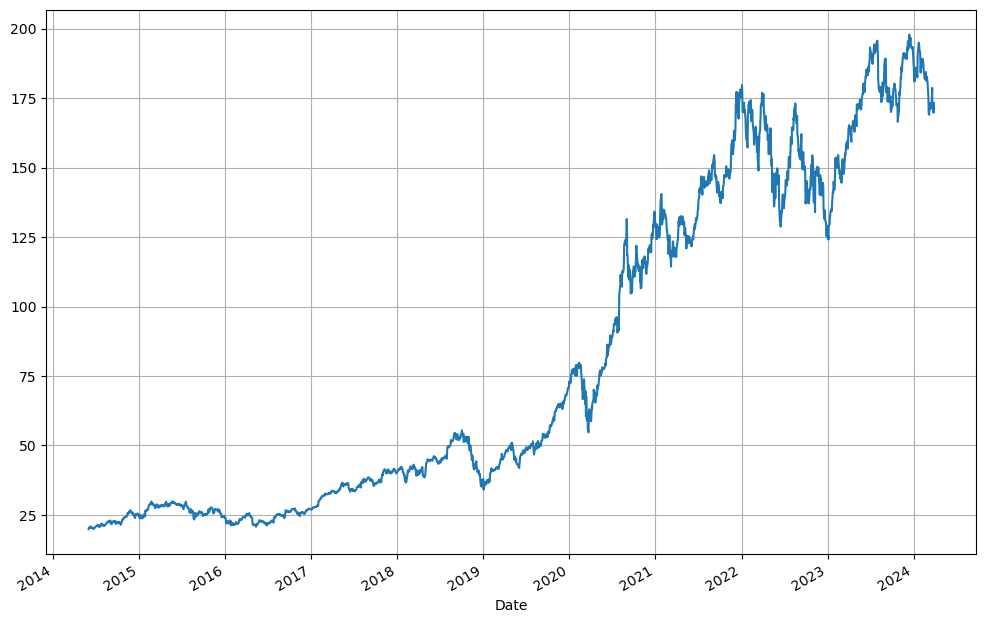

In [15]:
_ = daily_close_px['AAPL'].plot(figsize=(12,8))
plt.grid()

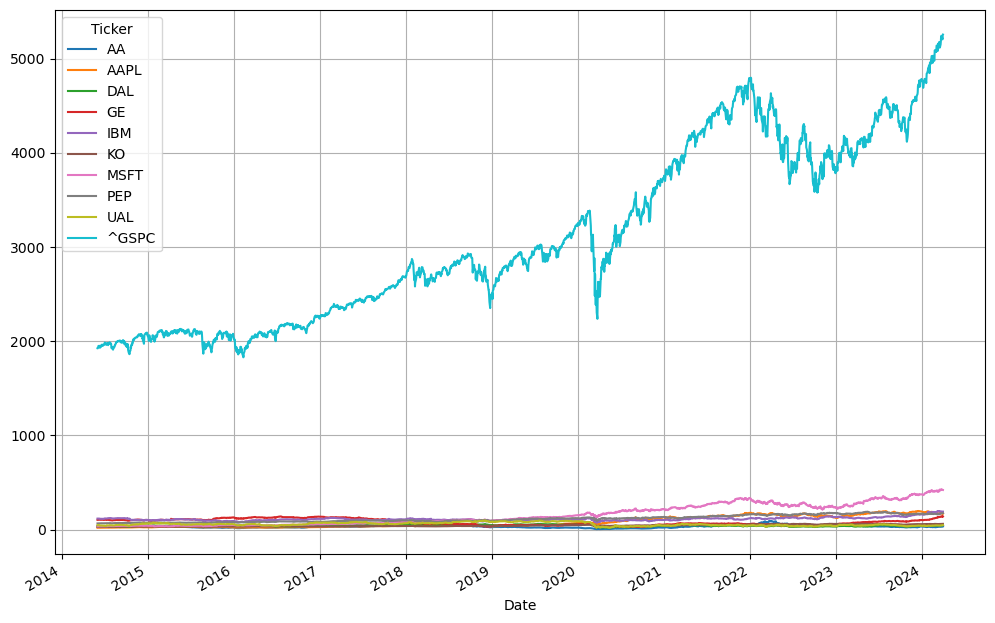

In [16]:
_ = daily_close_px.plot(figsize=(12,8))
plt.grid()

Grafico dei volumi

In [17]:
msftV = all_data.Volume.loc['MSFT']


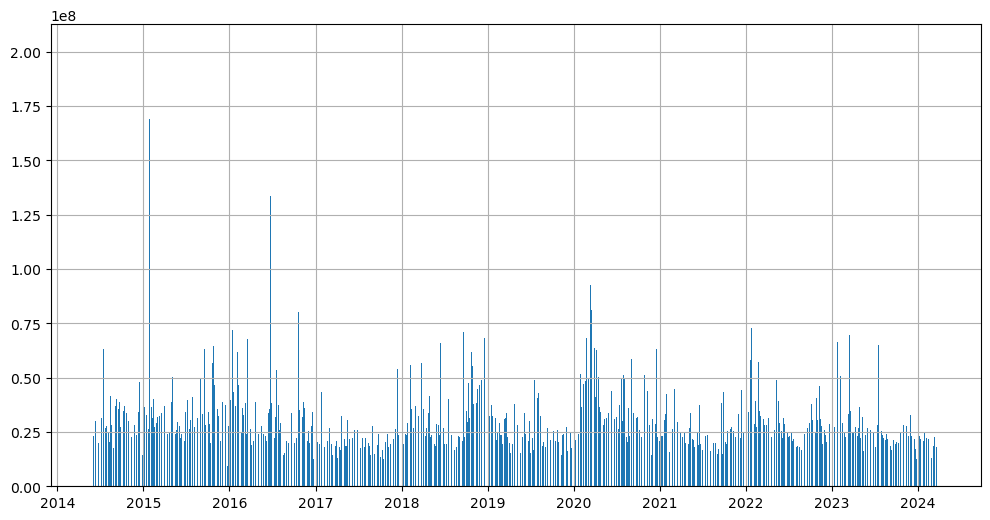

In [18]:
plt.bar(msftV.index, msftV)
plt.gcf().set_size_inches(12,6)
plt.grid()
plt.show()

Grafico di prezzi e volumi

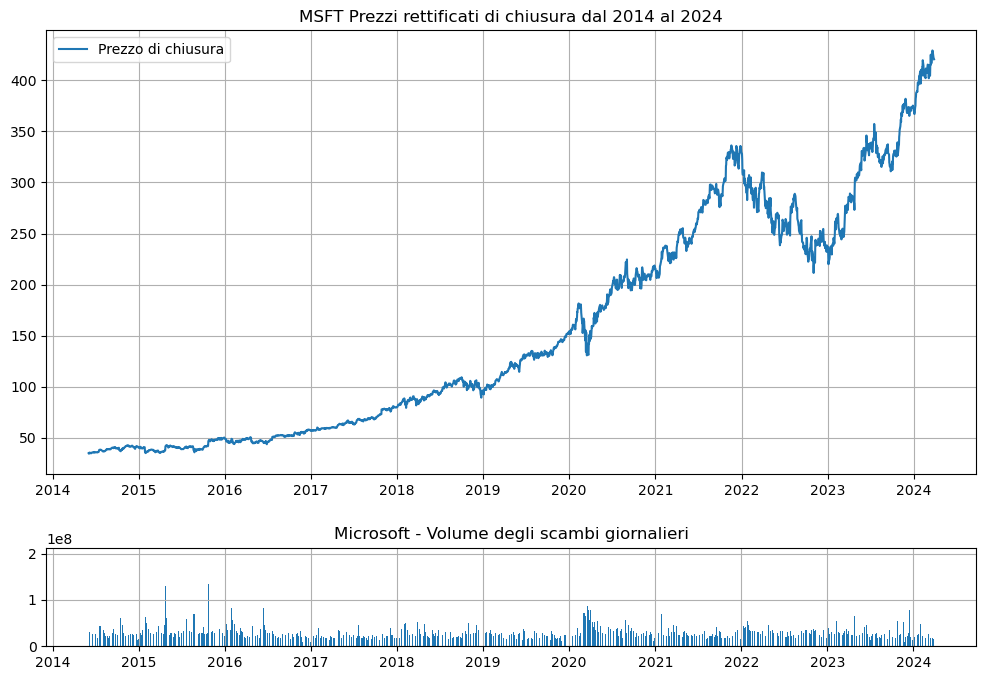

In [35]:
top = plt.subplot2grid((4,4), (0,0), rowspan=3, colspan = 4)
top.plot(daily_close_px.index,
        daily_close_px['MSFT'],
        label = 'Prezzo di chiusura')
plt.title('MSFT Prezzi rettificati di chiusura dal 2014 al 2024')
plt.legend(loc=2)
plt.grid()
bottom = plt.subplot2grid((4,4), (3,0), rowspan = 1, colspan = 4)
bottom.bar(msftV.index, msftV)
plt.title('Microsoft - Volume degli scambi giornalieri')
plt.gcf().set_size_inches(12,8)
plt.subplots_adjust(hspace=0.75)
plt.grid()